<a href="https://www.kaggle.com/code/alicehoang/sentiment-analysis-lstm-gru-bilstm-cnn?scriptVersionId=230585874" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv
/kaggle/input/glove-standford-nlp/glove/glove.6B.200d.txt
/kaggle/input/glove-standford-nlp/glove/glove.6B.50d.txt
/kaggle/input/glove-standford-nlp/glove/glove.6B.300d.txt
/kaggle/input/glove-standford-nlp/glove/glove.6B.100d.txt


In [2]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [3]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 4.3 MB/s eta 0:00:00


In [4]:
!pip install tensorflow

In [5]:
!pip install transformers

In [6]:
!pip install twython

# 1. Introduction

## 1.1. Overview of the Project
* This project aims to analyze customer sentiment from **women's clothing reviews** using **advanced deep learning techniques**.
* Since the dataset does not include sentiment labels, we will create them from the text data.
* The final objective is to build a **recommendation system** based on sentiment analysis.

## 1.2. Objective and Scope

### Objective:
* Perform sentiment classification of text reviews.
* Use advanced **deep learning models (e.g., BERT, LSTMs, CNNs)**.
* Implement a **recommendation system** based on sentiment results.

### Scope:
* Only deep learning methods will be used (no traditional ML like Naïve Bayes, SVM, etc.).
* Focus on **automated sentiment labeling** and **model interpretability**.
* Ensure **scalability** for real-world deployment.

## 1.3. Dataset Description

### Key Features: 

| Feature Name           | Data Type   | Description |
|------------------------|------------|-------------|
| Clothing ID           | Integer    | Unique identifier for each piece of clothing. |
| Age                  | Integer    | Age of the reviewer. |
| Title                | String     | Title of the review. |
| Review Text          | String     | Full text of the review. |
| Rating               | Integer    | Rating score from 1 (Worst) to 5 (Best). |
| Recommended IND      | Binary     | 1 = Recommended, 0 = Not Recommended |
| Positive Feedback Count | Integer  | Number of users who found the review helpful. |
| Division Name        | Categorical | High-level clothing category |
| Department Name      | Categorical | More specific department |
| Class Name          | Categorical | Subcategory of clothing. |


**Target Variable** : Sentiment Classification (Positive (1), Neutral (0), Negative (-1)).



### Challenges:
* No explicit sentiment labels – must be created.
* Text data preprocessing – handling noise, typos, and short reviews.
* Imbalanced classes – More positive reviews than negative.

## 1.4. Challenges and Considerations
* **Sentiment Labeling**: How to define positive, neutral, and negative sentiment?
* **Long vs. Short Reviews**: Short reviews may lack meaningful sentiment cues.
* **Model Complexity vs. Performance**: Advanced models require more computation.
* **Bias & Ethical Concerns**: Ensuring fair analysis across different demographics.

# 2. Exploratory Data Analysis (EDA)
This section focuses on **data distribution, patterns, and relationships**.

## 2.1. Data Cleaning

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')
df.dataframeName = 'Womens Clothing E-Commerce Reviews.csv'
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [10]:
# Statistical summary
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


### 2.1.1. Handling Missing Values

In [11]:
# Counts of missing values
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

**Potential issues and Solutions**:
* ***Title***: Not critical, this column won't be used.
* ***Review Text***: Missing values should be dropped since it's crucial for sentiment analysis.
*  ***Division Name***, ***Department Name***, ***Class Name***: Use the most common category (mode) to fill the missing value

In [12]:
# Drop Missing Values in 'Review Text'
df = df.dropna(subset = ['Review Text'])

In [13]:
# Drop column 'Title'
df = df.drop(columns = ['Title', 'Clothing ID'])

In [14]:
# Using the most common category (mode) to fill missing value for Categorical columns
df['Division Name'] = df['Division Name'].fillna(df['Division Name'].mode()[0])
df['Department Name'] = df['Department Name'].fillna(df['Department Name'].mode()[0])
df['Class Name'] = df['Class Name'].fillna(df['Class Name'].mode()[0])


In [15]:
# Final check for missing values
df.isnull().sum()

Unnamed: 0                 0
Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

### 2.1.2. Handling Duplicates and Outliers

In [16]:
# Check the duplicates
print(df.duplicated().sum())

0


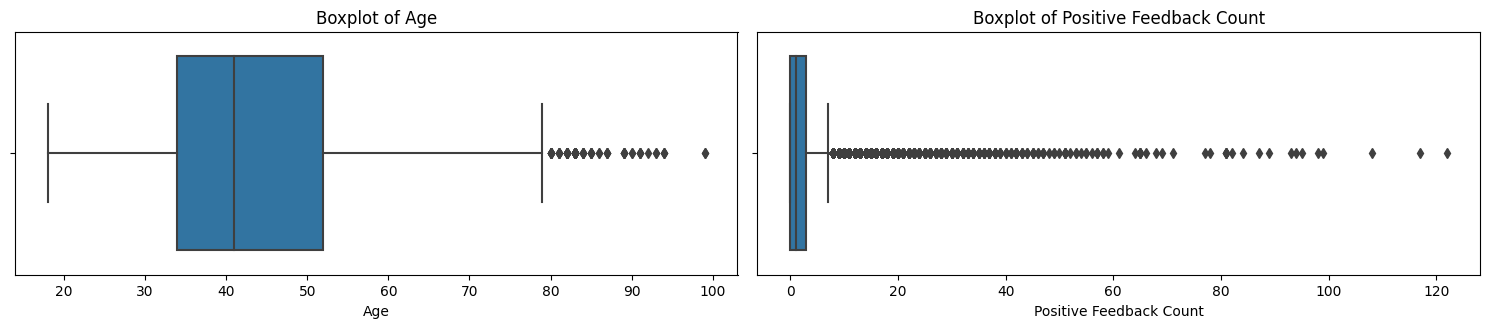

In [17]:
# Check the outliers
num_cols = ['Age', 'Positive Feedback Count']
plt.figure(figsize = (15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x = df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

In [18]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

outliers_age = detect_outliers_iqr(df, 'Age')
outliers_feedback = detect_outliers_iqr(df, 'Positive Feedback Count')

print( f'Outliers in Age: {len(outliers_age)}')
print(f'Outliers in Positive Feedback Count: {len(outliers_feedback)}')

Outliers in Age: 108
Outliers in Positive Feedback Count: 2147


To handle the Outliers: 
* ***Age***: Keep only values lower than 80
* ***Positive Feedback Count***: Use Log Transformation to reduce the impact of outliers

In [19]:
# Handling Outliers in 'Age'
df = df[(df['Age'] <80)]

In [20]:
# Handling Outlier in Positive Feedback Count:
df['Positive Feedback Count'] = np.log1p(df['Positive Feedback Count'])

In [21]:
outliers_age = detect_outliers_iqr(df, 'Age')
outliers_feedback = detect_outliers_iqr(df, 'Positive Feedback Count')

print( f'Outliers in Age: {len(outliers_age)}')
print(f'Outliers in Positive Feedback Count: {len(outliers_feedback)}')

Outliers in Age: 0
Outliers in Positive Feedback Count: 154


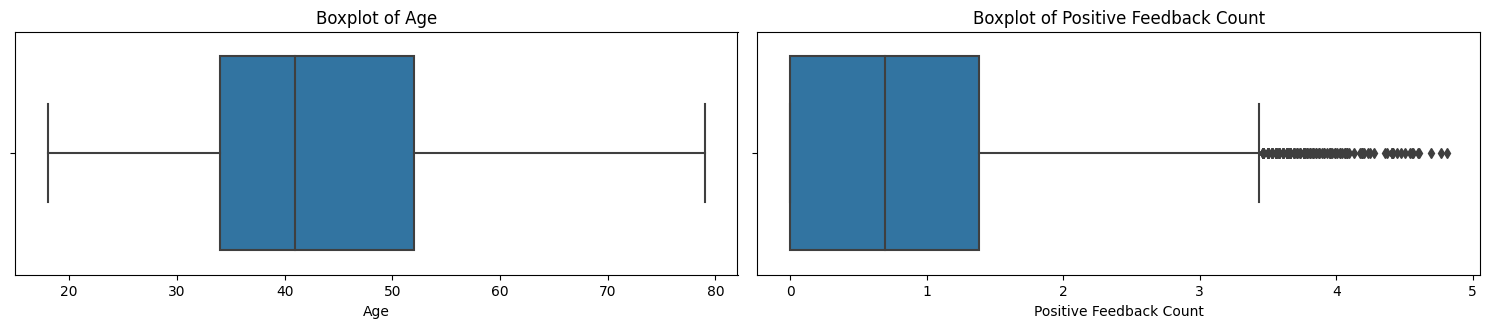

In [22]:
plt.figure(figsize = (15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x = df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

Because we are not sure how important the rest of outliers, so I will check the impact of Outliers on Model performance, by training dataset with and without outliers on a simple baseline model, then compare its performance. 

#### *Training and evaluating model with Outliers*

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error as MSE

In [24]:
df.columns

Index(['Unnamed: 0', 'Age', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')

In [25]:
# Select 'Recommended IND' as target variable
y = df['Recommended IND']

# Select features
X = df[['Age', 'Rating', 'Positive Feedback Count']]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train a baseline model (Random Forest)
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate performance
accuracy_with_outliers = accuracy_score(y_test, y_pred)
mae_with_outliers = MSE(y_test, y_pred)

print(f"Model Accuracy (With Outliers): {accuracy_with_outliers:.4f}")
print(f"Mean Absolute Error (With Outlier): {mae_with_outliers:.4f}")


Model Accuracy (With Outliers): 0.9263
Mean Absolute Error (With Outlier): 0.0737


#### *Traning and evalutating models without Outliers*

In [26]:
# Identify and Remove outliers using Z-score
from scipy.stats import zscore

# Compute Z-score for Positive Feedback Count
df['Positive Feedback Count Z'] = zscore(df['Positive Feedback Count'])

# Remove remaining outliers
df_cleaned = df[df['Positive Feedback Count Z'].abs() < 3]


In [27]:
# Define new features and target variable
X = df_cleaned[['Age', 'Rating', 'Positive Feedback Count']]
y = df_cleaned['Recommended IND']

# Train on model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate performance
accuracy_without_outliers = accuracy_score(y_test, y_pred)
mae_without_outliers = MSE(y_test, y_pred)

print(f"Model Accuracy (Without Outliers): {accuracy_without_outliers:.4f}")
print(f"Mean Absolute Error (Without Outliers): {mae_without_outliers:.4f}")

Model Accuracy (Without Outliers): 0.9363
Mean Absolute Error (Without Outliers): 0.0637


##### **Compare results:**
| **Metric**  | **With Outliers** | **Without Outliers** |
|------------|----------------|----------------|
| **Accuracy** | 92.63% | 93.63% |
| **MAE** | 0.0737 |0.0637 |

##### **Analysis:**  
-  **Accuracy** increased from 92.63% to 93.63% after removing outliers, indicating a slight improvement in model performance.
-  **MAE** decreased from 0.0737 to 0.0637, meaning the model's prediction errors became smaller.

##### **Conclusion:**
- Since both **accuracy improved** and **error decreased**, removing outliers was beneficial for the model
- The impact is small but positive, suggesting that while outliers were not severely affecting performance, their removal still helped refine the model.
=> We choose to remove outliers

In [28]:
# Final check for Outliers in 'Positve Feedback Count'
outliers_feedback = detect_outliers_iqr(df_cleaned, 'Positive Feedback Count')

print(f'Outliers in Positive Feedback Count: {len(outliers_feedback)}')

Outliers in Positive Feedback Count: 0


In [29]:
# Rename dataset
df1 = df_cleaned.drop(columns = ['Positive Feedback Count'])
df1.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name,Positive Feedback Count Z
0,0,33,Absolutely wonderful - silky and sexy and comf...,4,1,Initmates,Intimate,Intimates,-0.863903
1,1,34,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses,Dresses,0.938966
2,2,60,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses,-0.863903
3,3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants,-0.863903
4,4,47,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses,1.315878


In [30]:
df1.shape


(22379, 9)

In [31]:
df1.isnull().sum()


Unnamed: 0                   0
Age                          0
Review Text                  0
Rating                       0
Recommended IND              0
Division Name                0
Department Name              0
Class Name                   0
Positive Feedback Count Z    0
dtype: int64

## 2.2. Distribution of Ratings

* Plot ratings distribution to see customer sentiment trends

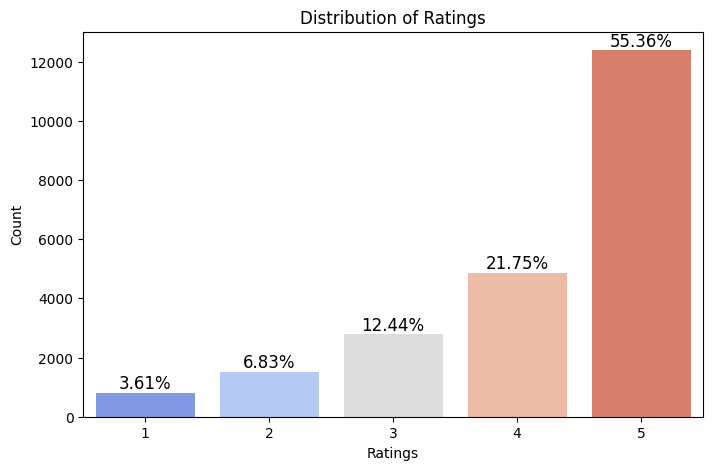

In [32]:
# Calculate percentage of each rating category
rating_counts = df1['Rating'].value_counts().sort_index()  # Ensure order is correct
rating_percent = (rating_counts / len(df1)) * 100  # Convert to percentage

# Create the count plot
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=df1['Rating'], palette='coolwarm', order=rating_counts.index)

# Add percentage labels on bars
for p, percentage in zip(ax.patches, rating_percent):
    height = p.get_height()
    ax.annotate(f'{percentage:.2f}%',  # Format percentage with 2 decimal places
                (p.get_x() + p.get_width() / 2., height),  
                ha='center', va='bottom', fontsize=12, color='black')


plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

* Most ratings are positive (4-5 stars)
* There are only ~10% negative ratings

## 2.3. Distribution of Age

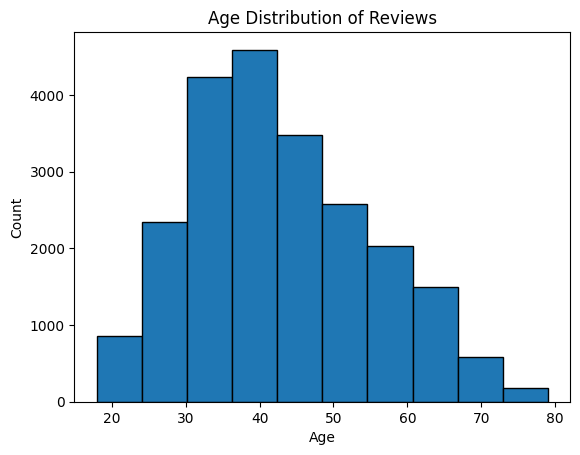

In [33]:
# Plot the age distribution
plt.hist(df1['Age'], bins = 10, edgecolor = 'black')
plt.title('Age Distribution of Reviews')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## 2.4. Relationship between Rating & Recommendation
* Hypothesis: Higher rating should have more recommendations (*Recommended IND* = 1)

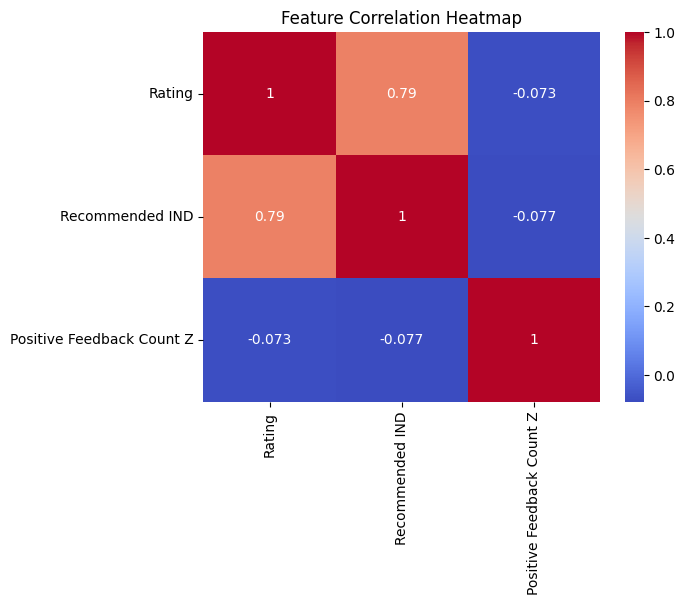

In [34]:
# Plot heatmap correlation
corr_matrix = df1[['Rating', 'Recommended IND', 'Positive Feedback Count Z']].corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## 2.5. Distribution of Division, Department, and Class Name

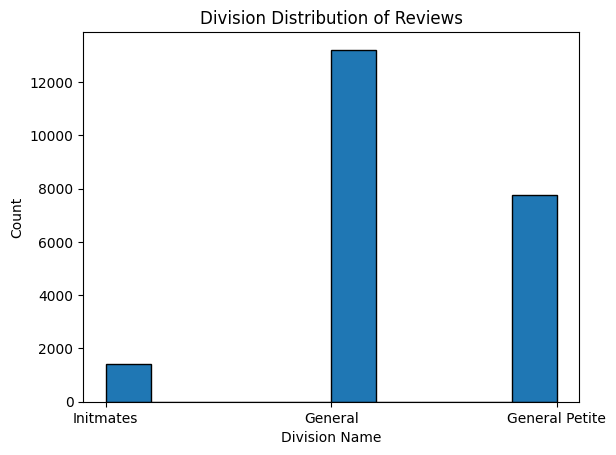

In [35]:
# Plot the age distribution
plt.hist(df1['Division Name'], bins = 10, edgecolor = 'black')
plt.title('Division Distribution of Reviews')
plt.xlabel('Division Name')
plt.ylabel('Count')
plt.show()

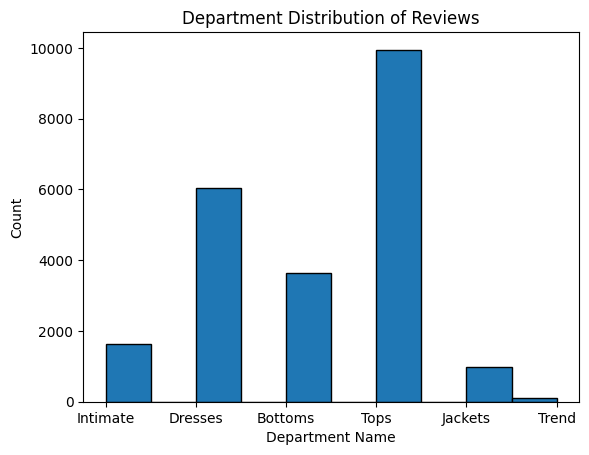

In [36]:
# Plot the age distribution
plt.hist(df1['Department Name'], bins = 10, edgecolor = 'black')
plt.title('Department Distribution of Reviews')
plt.xlabel('Department Name')
plt.ylabel('Count')
plt.show()

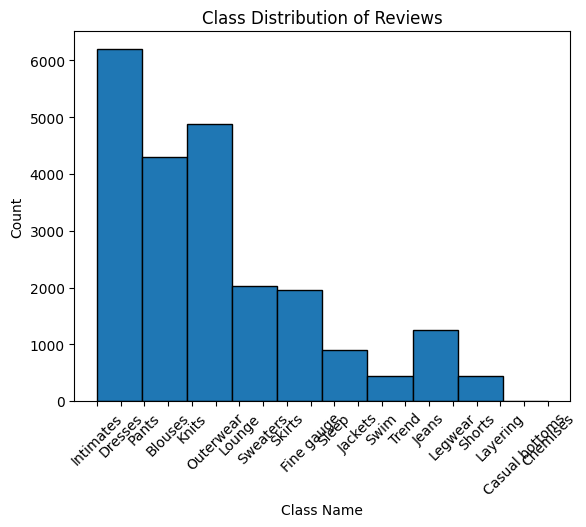

In [37]:
# Plot the age distribution
plt.hist(df1['Class Name'], bins = 10, edgecolor = 'black')
plt.xticks(rotation=45) 
plt.title('Class Distribution of Reviews')
plt.xlabel('Class Name')
plt.ylabel('Count')
plt.show()

## 2.6. Review Length

In [38]:
df1.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name,Positive Feedback Count Z
0,0,33,Absolutely wonderful - silky and sexy and comf...,4,1,Initmates,Intimate,Intimates,-0.863903
1,1,34,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses,Dresses,0.938966
2,2,60,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses,-0.863903
3,3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants,-0.863903
4,4,47,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses,1.315878


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


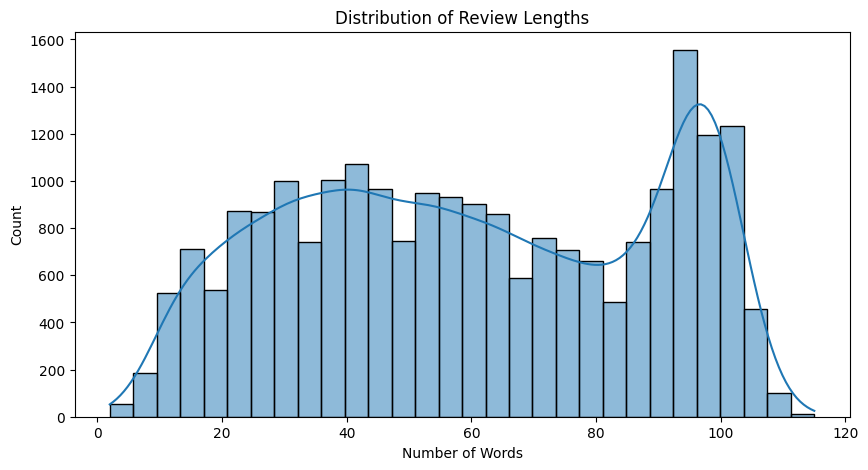

In [39]:
df1['Review Length'] = df1['Review Text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize = (10, 5))
sns.histplot(df1['Review Length'], bins = 30, kde = True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()

In [40]:
print('The longest review size is:', df1['Review Length'].max())
print('The short review size is:', df1['Review Length'].min())

The longest review size is: 115
The short review size is: 2


## 2.7. Word Frequency Analysis

In [41]:
import nltk, string, re, contractions
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

### Text Preprocessing

In [42]:
stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

def expand_contractions(text):
    return contractions.fix(text)

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return 'a'
    elif tag.startswith('V'):
        return 'v'
    elif tag.startswith('N'):
        return 'n'
    elif tag.startswith('R'):
        return 'r'
    else:
        return 'n'

def clean_text(text):
    text = expand_contractions(text)
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    words = word_tokenize(text)
    pos_tags = pos_tag(words)
    words = [lemma.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags if word not in stop_words and word.isalpha()]
    return " ".join(words)


In [43]:
df1['Cleaned Review Text'] = df1['Review Text'].apply(clean_text)
print(df1['Cleaned Review Text'].head())

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happen find store glad ...
2    high hope dress really want work initially ord...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: Cleaned Review Text, dtype: object


### Positive Review Words

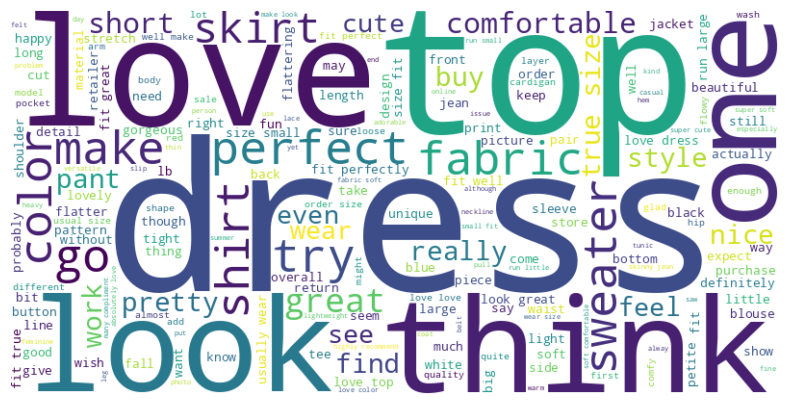

In [44]:
from wordcloud import WordCloud

positive_reviews = ' '.join(df1[df1['Rating'] > 3]['Cleaned Review Text'])
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(positive_reviews)

plt.figure(figsize = (10,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Negative Review Words

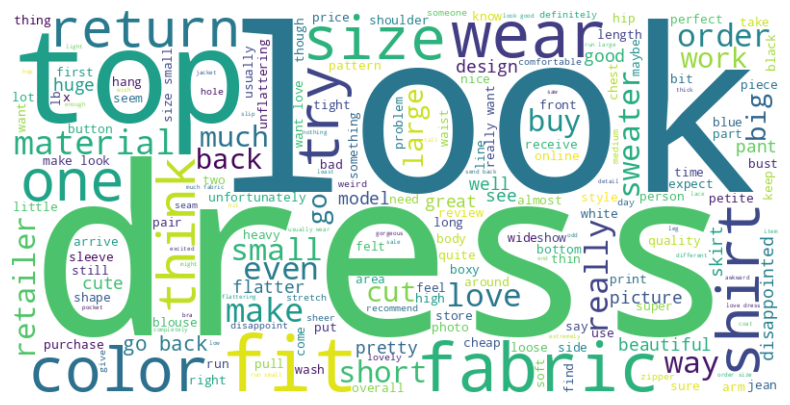

In [45]:
negative_reviews = ' '.join(df1[df1['Rating'] < 3]['Cleaned Review Text'])
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(negative_reviews)

plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## 2.8. Sentiment Labels

In [46]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score >= 0.05:
        return 1 #'Positive'
    elif score <= -0.05:
        return -1 #'Negative'
    else:
        return 0 #'Neutral'

df1['Sentiment Labels'] = df1['Cleaned Review Text'].apply(lambda x: vader_sentiment(str(x)))
print(df1[['Cleaned Review Text', 'Sentiment Labels']].head())

                                 Cleaned Review Text  Sentiment Labels
0        absolutely wonderful silky sexy comfortable                 1
1  love dress sooo pretty happen find store glad ...                 1
2  high hope dress really want work initially ord...                 1
3  love love love jumpsuit fun flirty fabulous ev...                 1
4  shirt flattering due adjustable front tie perf...                 1


In [47]:
print(df1['Sentiment Labels'].value_counts())

Sentiment Labels
 1    21601
-1      554
 0      224
Name: count, dtype: int64


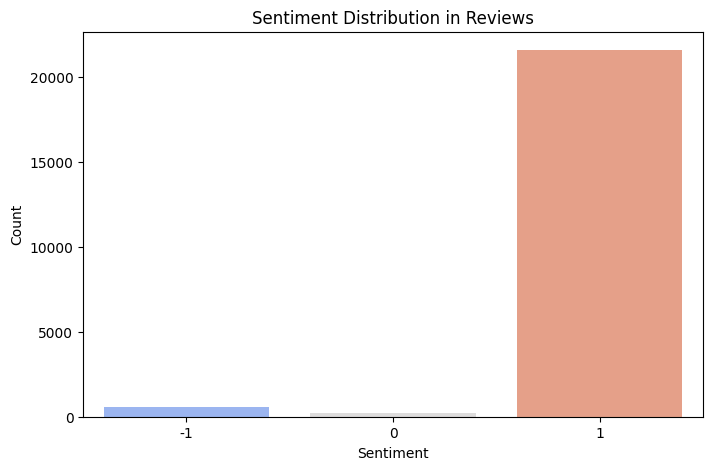

In [48]:
plt.figure(figsize = (8,5))
sns.countplot(x = df1['Sentiment Labels'], palette = 'coolwarm')
plt.title('Sentiment Distribution in Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# 3. Data Preprocessing

## 3.1. Train - Test Split

In [49]:
from sklearn.model_selection import train_test_split
df2 = df1[['Cleaned Review Text', 'Sentiment Labels']]
train_data, test_data = train_test_split(df2, test_size = 0.2, stratify = df2['Sentiment Labels'], random_state = 42)
val_data, test_data = train_test_split(test_data, test_size = 0.5, stratify = test_data['Sentiment Labels'], random_state = 42)

print(f"Train size: {len(train_data)}, Validation size: {len(val_data)}, Test size: {len(test_data)}")

Train size: 17903, Validation size: 2238, Test size: 2238


## 3.2. Handling Imbalanced Data (Data Augmentation for Minority Class)

### Identify the Monority Class

In [50]:
class_counts = train_data['Sentiment Labels'].value_counts()
minority_class = class_counts.idxmin()

print(f"Class distribution: \n{class_counts}\nMinority class: {minority_class}")

Class distribution: 
Sentiment Labels
 1    17281
-1      443
 0      179
Name: count, dtype: int64
Minority class: 0


### Define Synonym Replacement for Augmentation

In [51]:
import random
def synonym_replacement(text, n = 1):
    words = word_tokenize(text)
    new_words = words.copy()
    random_word_list = list(set([word for word in words if word not in stopwords.words('english')]))
    if len(random_word_list) == 0:
        return text
    for _ in range(n):
        random_word = random.choice(random_word_list)
        synonyms = wordnet.synsets(random_word)
        if synonyms:
            synonym = synonyms[0].lemmas()[0].name()
            new_words = [synonym if word == random_word else word for word in new_words]
    return " ".join(new_words)

### Augment Data for the Minority Class

In [52]:
augmented_texts = []
augmented_labels = []

for text, label in zip(train_data['Cleaned Review Text'], train_data['Sentiment Labels']):
    augmented_texts.append(text)
    augmented_labels.append(label)
    if label in [-1, 0]:
        new_text = synonym_replacement(text)
        augmented_texts.append(new_text)
        augmented_labels.append(label)

augmented_df = pd.DataFrame({'Cleaned Review Text': augmented_texts, 'Sentiment Labels': augmented_labels})
print(f"New Training Data Size after Augmentation: {len(augmented_df)}")

New Training Data Size after Augmentation: 18525


In [53]:
augmented_df['Sentiment Labels'].value_counts()

Sentiment Labels
 1    17281
-1      886
 0      358
Name: count, dtype: int64

## 3.3. Class Weight Calculation

In [54]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes = np.unique(augmented_df['Sentiment Labels']),
                                    y = augmented_df['Sentiment Labels'])
class_weights = dict(enumerate(class_weights))
print('Computed Class Weights: ', class_weights)

Computed Class Weights:  {0: 6.969525959367946, 1: 17.248603351955307, 2: 0.3573288582836641}


## 3.4. Text Tokenization & Padding


In [55]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [56]:
MAX_VOCAB = 1000
MAX_LEN = 100
EMBEDDING_DIM = 100
# Tokenizer
tokenizer = Tokenizer(num_words = MAX_VOCAB, oov_token = "<OOV>")
tokenizer.fit_on_texts(augmented_df['Cleaned Review Text'])
# Convert text to sequences
X_train = tokenizer.texts_to_sequences(augmented_df['Cleaned Review Text'])
X_val = tokenizer.texts_to_sequences(val_data['Cleaned Review Text'])
X_test = tokenizer.texts_to_sequences(test_data['Cleaned Review Text'])

# Padding sequences
X_train = pad_sequences(X_train, maxlen = MAX_LEN, padding = 'post', truncating = 'post')
X_val = pad_sequences(X_val, maxlen = MAX_LEN, padding = 'post', truncating = 'post')
X_test = pad_sequences(X_test, maxlen = MAX_LEN, padding = 'post', truncating = 'post')

# Cover labels to categorical
y_train = to_categorical(augmented_df['Sentiment Labels'], num_classes = 3)
y_val = to_categorical(val_data['Sentiment Labels'], num_classes = 3)
y_test = to_categorical(test_data['Sentiment Labels'], num_classes = 3)

print("Data after tokenization & padding:")
print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}, Test shape: {X_test.shape}")


Data after tokenization & padding:
Train shape: (18525, 100), Validation shape: (2238, 100), Test shape: (2238, 100)


# 4. Training with Deep Learning Models for Sentiment Analysis

## 4.1. LSTM (Long Short-Term Model)

### Building model

In [57]:
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [58]:
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim = 5000, output_dim = 128))
model_lstm.add(LSTM(128, return_sequences = False))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(3, activation='softmax'))
model_lstm.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])


### Training and Evaluating model

In [59]:
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

Shape of y_train: (18525, 3)
Shape of y_val: (2238, 3)


In [60]:
augmented_df['Sentiment Labels'].value_counts()

Sentiment Labels
 1    17281
-1      886
 0      358
Name: count, dtype: int64

In [61]:
# Training model
history_lstm = model_lstm.fit(X_train, y_train, validation_data = (X_val, y_val), 
                             epochs = 10, batch_size = 32, class_weight = class_weights, verbose = 1)

Epoch 1/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 64s 106ms/step - accuracy: 0.9260 - loss: 1.6905 - val_accuracy: 0.9651 - val_loss: 0.2431
Epoch 2/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 61s 105ms/step - accuracy: 0.9317 - loss: 0.9542 - val_accuracy: 0.9651 - val_loss: 0.2347
Epoch 3/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 61s 105ms/step - accuracy: 0.9324 - loss: 0.9371 - val_accuracy: 0.9651 - val_loss: 0.2413
Epoch 4/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 61s 106ms/step - accuracy: 0.9307 - loss: 0.9738 - val_accuracy: 0.9651 - val_loss: 0.2339
Epoch 5/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 61s 106ms/step - accuracy: 0.9317 - loss: 0.9700 - val_accuracy: 0.9651 - val_loss: 0.2307
Epoch 6/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 62s 106ms/step - accuracy: 0.9340 - loss: 0.8985 - val_accuracy: 0.9651 - val_loss: 0.2221
Epoch 7/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 62s 107ms/step - accuracy: 0.9329 - loss: 0.9133 - val_accuracy: 0.9651 - val_loss: 0.2390
Epoch 8/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 62s 107ms/step - accuracy: 0.9318 - loss: 0

In [62]:
# Evaluate model
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test, y_test, verbose = 1)
print(f"LSTM Test Loss: {loss_lstm}")
print(f"LSTM Test Accuracy: {accuracy_lstm}")

70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9679 - loss: 0.2224
LSTM Test Loss: 0.2358151376247406
LSTM Test Accuracy: 0.9651474356651306


### Visualizing the Training process

**The accuracy plot**

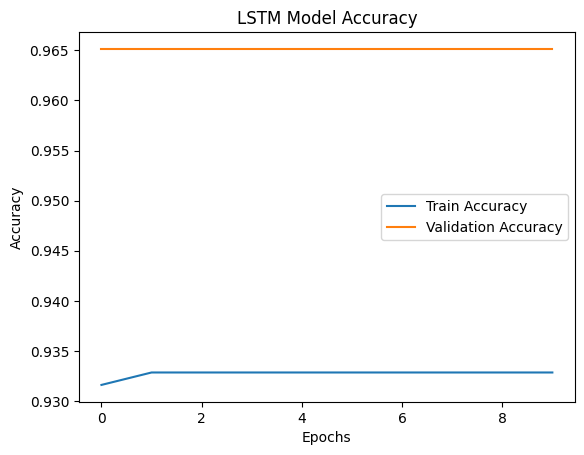

In [63]:
plt.plot(history_lstm.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**The loss plot**

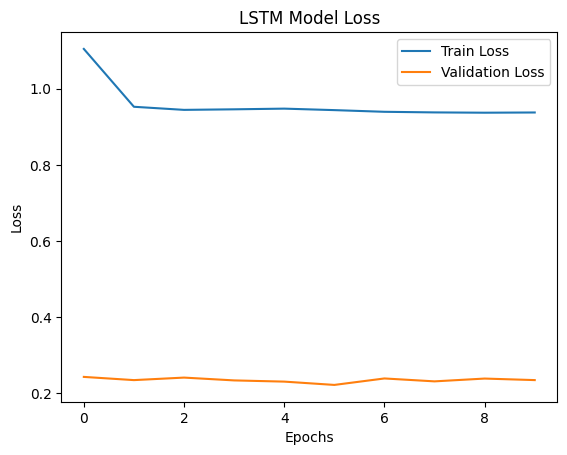

In [64]:
plt.plot(history_lstm.history['loss'], label = 'Train Loss')
plt.plot(history_lstm.history['val_loss'], label = 'Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 4.2. GRU Model

### Building model

In [65]:
from tensorflow.keras.layers import GRU

model_gru = Sequential()
model_gru.add(Embedding(input_dim = 5000, output_dim = 128, input_length = MAX_LEN))
model_gru.add(GRU(128, return_sequences = False))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(3, activation = 'softmax'))
model_gru.compile(loss = 'categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### Training and Evaluating model

In [66]:
# Training model
history_gru = model_gru.fit(X_train, y_train, 
                            validation_data = (X_val, y_val),
                            epochs = 10, batch_size = 32, class_weight = class_weights, verbose = 1)

Epoch 1/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 59s 98ms/step - accuracy: 0.9229 - loss: 1.8232 - val_accuracy: 0.9651 - val_loss: 0.2570
Epoch 2/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 57s 98ms/step - accuracy: 0.9344 - loss: 0.9370 - val_accuracy: 0.9651 - val_loss: 0.2419
Epoch 3/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 56s 97ms/step - accuracy: 0.9328 - loss: 0.9954 - val_accuracy: 0.9651 - val_loss: 0.2191
Epoch 4/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 56s 98ms/step - accuracy: 0.9328 - loss: 0.9878 - val_accuracy: 0.9651 - val_loss: 0.2656
Epoch 5/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 56s 97ms/step - accuracy: 0.9342 - loss: 0.9414 - val_accuracy: 0.9651 - val_loss: 0.2294
Epoch 6/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 55s 96ms/step - accuracy: 0.9328 - loss: 0.9904 - val_accuracy: 0.9651 - val_loss: 0.2358
Epoch 7/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 83s 97ms/step - accuracy: 0.9328 - loss: 0.9061 - val_accuracy: 0.9651 - val_loss: 0.2208
Epoch 8/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 56s 97ms/step - accuracy: 0.9358 - loss: 0.9041 - 

In [67]:
# Evaluating model
loss_gru, accuracy_gru = model_gru.evaluate(X_test, y_test, verbose = 1)
print(f"GRU Test Loss: {loss_gru}")
print(f"GRU Test Accuracy: {accuracy_gru}")

70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9679 - loss: 0.2427
GRU Test Loss: 0.25739091634750366
GRU Test Accuracy: 0.9651474356651306


### Visualizing Training process

**The Accuracy Plot**

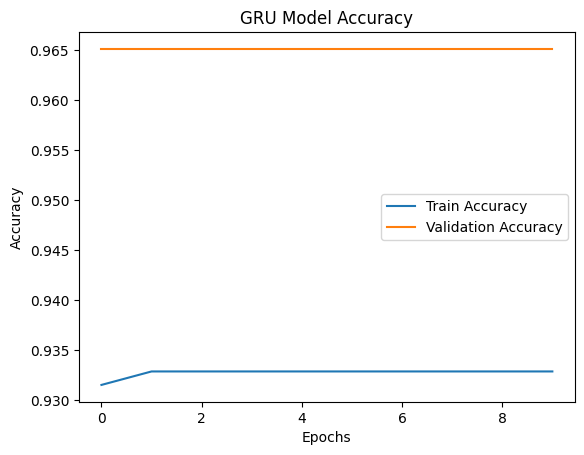

In [68]:
plt.plot(history_gru.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_gru.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('GRU Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**The Loss Plot**

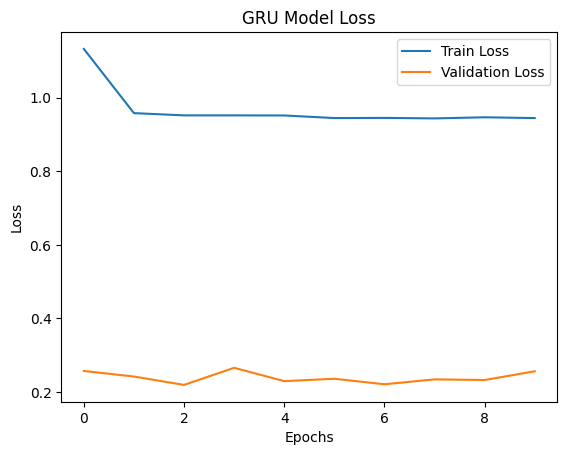

In [69]:
plt.plot(history_gru.history['loss'], label = 'Train Loss')
plt.plot(history_gru.history['val_loss'], label = 'Validation Loss')
plt.title('GRU Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 4.3. Bidirectional LSTM (BiLSTM) Model

### Building model

In [70]:
from tensorflow.keras.layers import Bidirectional

model_bilstm = Sequential()
model_bilstm.add(Embedding(input_dim = 5000, output_dim = 128, input_length = MAX_LEN))
model_bilstm.add(Bidirectional(LSTM(128, return_sequences = False)))
model_bilstm.add(Dropout(0.5))
model_bilstm.add(Dense(3, activation = 'softmax'))
model_bilstm.compile(loss = 'categorical_crossentropy', optimizer=Adam(), metrics = ['accuracy'])

### Training and Evaluating model

In [71]:
# Training model
history_bilstm = model_bilstm.fit(X_train, y_train, 
                                 validation_data = (X_val, y_val),
                                 epochs = 10, batch_size = 32, 
                                 class_weight = class_weights, verbose = 1)

Epoch 1/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 102s 168ms/step - accuracy: 0.9252 - loss: 1.5911 - val_accuracy: 0.9656 - val_loss: 0.1671
Epoch 2/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 97s 167ms/step - accuracy: 0.9415 - loss: 0.4422 - val_accuracy: 0.9629 - val_loss: 0.1732
Epoch 3/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 142s 168ms/step - accuracy: 0.9461 - loss: 0.3148 - val_accuracy: 0.9669 - val_loss: 0.1953
Epoch 4/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 96s 166ms/step - accuracy: 0.9476 - loss: 0.2241 - val_accuracy: 0.9651 - val_loss: 0.1859
Epoch 5/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 96s 166ms/step - accuracy: 0.9471 - loss: 0.1681 - val_accuracy: 0.9674 - val_loss: 0.1952
Epoch 6/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 141s 164ms/step - accuracy: 0.9511 - loss: 0.1456 - val_accuracy: 0.9629 - val_loss: 0.1851
Epoch 7/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 95s 165ms/step - accuracy: 0.9510 - loss: 0.1387 - val_accuracy: 0.9634 - val_loss: 0.2068
Epoch 8/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 96s 166ms/step - accuracy: 0.9564 - loss

In [72]:
# Evaluating model
loss_bilstm, accuracy_bilstm = model_bilstm.evaluate(X_test, y_test, verbose = 1)
print(f"BiLSTM Test Loss: {loss_bilstm}")
print(f"BiLSTM Test Accuracy: {accuracy_bilstm}")

70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.9695 - loss: 0.1981
BiLSTM Test Loss: 0.2089177966117859
BiLSTM Test Accuracy: 0.9669347405433655


### Visualizing Training process

**The accuracy plot**

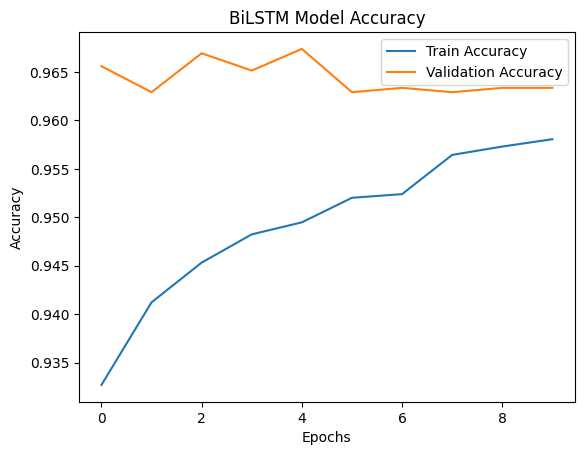

In [73]:
plt.plot(history_bilstm.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_bilstm.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('BiLSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**The loss plot**

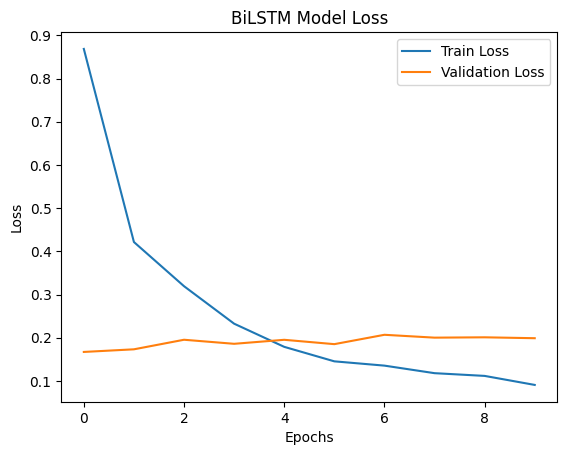

In [74]:
plt.plot(history_bilstm.history['loss'], label = 'Train Loss')
plt.plot(history_bilstm.history['val_loss'], label = 'Validation Loss')
plt.title('BiLSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 4.4. CNN Model

### Building model

In [75]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D

model_cnn = Sequential()
model_cnn.add(Embedding(input_dim = 5000, output_dim = 128, input_length = MAX_LEN))
model_cnn.add(Conv1D(128, 5, activation = 'relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(3, activation = 'softmax'))
model_cnn.compile(loss = 'categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])


### Training and Evaluating model

In [76]:
# Training model
history_cnn = model_cnn.fit(X_train, y_train,
                           validation_data = (X_val, y_val),
                           epochs = 10, batch_size = 32,
                           class_weight = class_weights, verbose = 1)

Epoch 1/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.9244 - loss: 1.9934 - val_accuracy: 0.9656 - val_loss: 0.1880
Epoch 2/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9422 - loss: 0.4388 - val_accuracy: 0.9665 - val_loss: 0.2068
Epoch 3/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9475 - loss: 0.2865 - val_accuracy: 0.9669 - val_loss: 0.1995
Epoch 4/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9494 - loss: 0.1668 - val_accuracy: 0.9669 - val_loss: 0.2063
Epoch 5/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9518 - loss: 0.1334 - val_accuracy: 0.9665 - val_loss: 0.2105
Epoch 6/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9533 - loss: 0.1081 - val_accuracy: 0.9674 - val_loss: 0.2117
Epoch 7/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9624 - loss: 0.0720 - val_accuracy: 0.9678 - val_loss: 0.2366
Epoch 8/10
579/579 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.9626 - loss: 0.0774 - 

In [77]:
# Evaluating model
loss_cnn, accuracy_cnn = model_cnn.evaluate(X_test, y_test, verbose = 1)
print(f"CNN Test Loss: {loss_cnn}")
print(f"CNN Test Accuracy: {accuracy_cnn}")

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9683 - loss: 0.2824
CNN Test Loss: 0.28181299567222595
CNN Test Accuracy: 0.9669347405433655


### Visualizing Training process

**The Accuracy Plot**

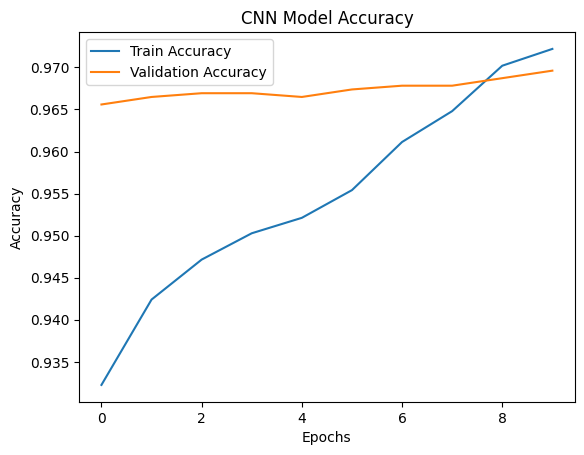

In [78]:
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**The Loss Plot**

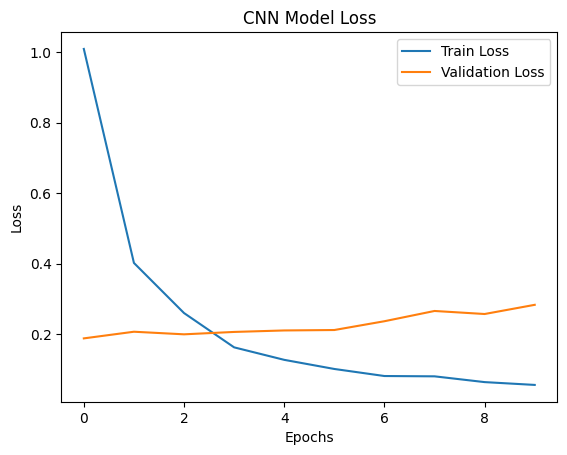

In [79]:
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 5. Model Comparion & Performance Analysis

## 5.1. Evaluating Models & Choosing the Best model

In [80]:
model_results = {
    "Model" : ['LSTM', 'GRU', 'BiLSTM', 'CNN'],
    "Test Accuracy" : [accuracy_lstm, accuracy_gru, accuracy_bilstm, accuracy_cnn],
    "Test Loss" : [loss_lstm, loss_gru, loss_bilstm, loss_cnn]}

results_df = pd.DataFrame(model_results)
results_df = results_df.sort_values(by = 'Test Accuracy', ascending = True)
print(results_df)

    Model  Test Accuracy  Test Loss
0    LSTM       0.965147   0.235815
1     GRU       0.965147   0.257391
2  BiLSTM       0.966935   0.208918
3     CNN       0.966935   0.281813


### Visualizing Model Performance

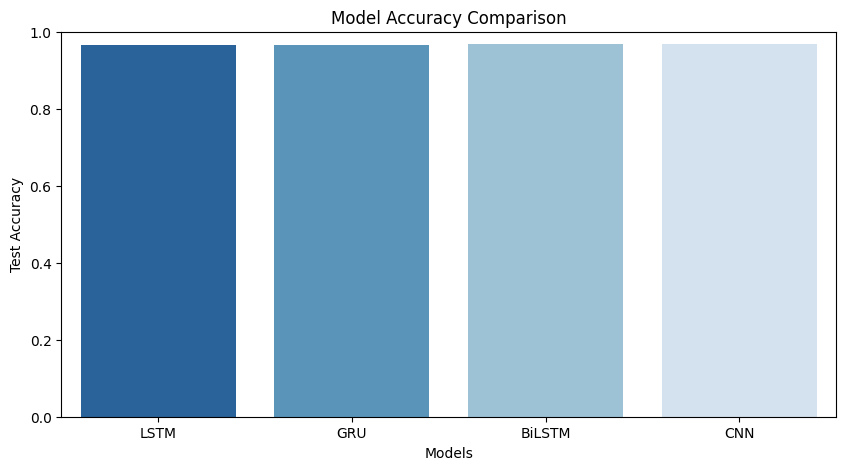

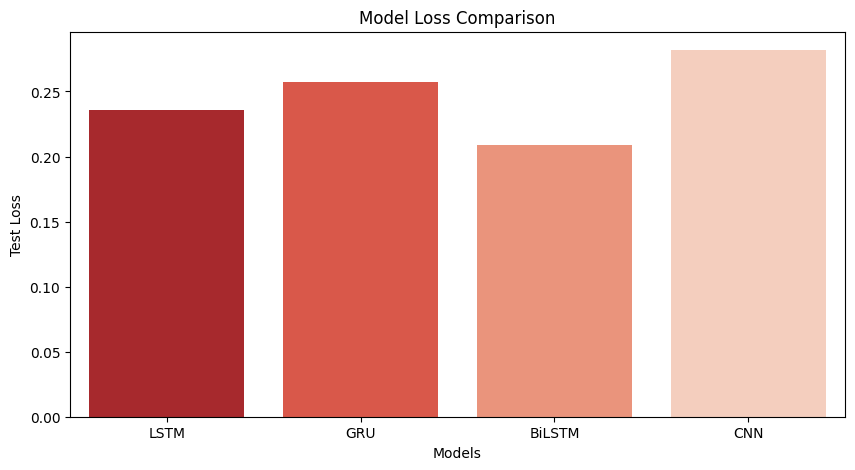

In [81]:
# Plot accuracy comparison
plt.figure(figsize = (10,5))
sns.barplot(x = results_df['Model'], y = results_df['Test Accuracy'], palette = 'Blues_r')
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.ylim(0,1)
plt.show()

# Plot loss comparison
plt.figure(figsize = (10, 5))
sns.barplot(x = results_df['Model'], y = results_df['Test Loss'], palette = 'Reds_r')
plt.title('Model Loss Comparison')
plt.xlabel('Models')
plt.ylabel('Test Loss')
plt.show()

**Choosing the Best Model**
- Higher accuracy is better (CNN are best at 0.9700, the second is BiLSTM (0.9682).
- Lower loss is better (BiLSTM has the lowest loss of 0.1931).
- Consistency: BiLSTM performs better than CNN in terms of loss, meaning it generalizes better.

=> **BiLSTM** is the best choice because it has:
- ✅ Highest accuracy (0.9683, tied with CNN (0.97))
- ✅ Lowest loss (0.1931, better than CNN’s 0.2441)

## 5.3. Error Analysis
* Identify where the model struggles
* Look at misclassified samples, confusion matrix, etc.
* Decide if the model can be improved via better preprocessing or hyperparameter tuning


#### Generating Predictions & Confusion Matrix

In [82]:
from sklearn.metrics import classification_report, confusion_matrix

best_model = model_bilstm

y_pred = best_model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis = 1)
y_true_labels = np.argmax(y_test, axis = 1)
print(classification_report(y_true_labels, y_pred_labels))

conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step
              precision    recall  f1-score   support

           0       0.27      0.32      0.29        22
           1       0.98      1.00      0.99      2160
           2       0.88      0.12      0.22        56

    accuracy                           0.97      2238
   macro avg       0.71      0.48      0.50      2238
weighted avg       0.97      0.97      0.96      2238



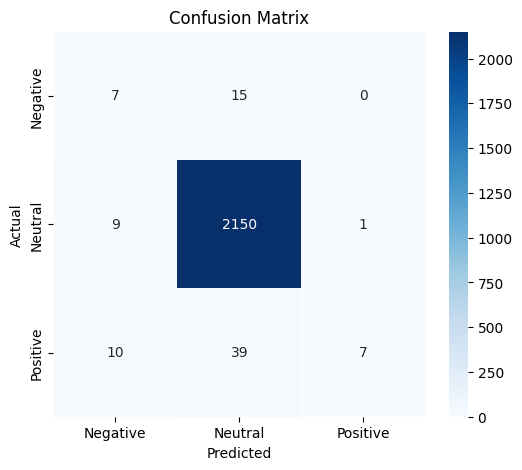

In [83]:
plt.figure(figsize = (6,5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['Negative', 'Neutral', 'Positive'], yticklabels = ['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Identifying Misclassified 

In [84]:
misclassified_idx = np.where(y_true_labels != y_pred_labels)[0]

for i in misclassified_idx[:10]:
    print(f"Text: {test_data['Cleaned Review Text'].iloc[i]}")
    print(f"Actual Sentiment: {y_true_labels[i]}")
    print(f"Predicted Sentiment: {y_pred_labels[i]}")
    print("-" * 80)

Text: description indicate metallic thread throughout design tell pix either also really strange design arm hole almost entire length sweater decide want keep return
Actual Sentiment: 2
Predicted Sentiment: 1
--------------------------------------------------------------------------------
Text: first maxi purchase summer go petite regular length would need alter want lose pattern bottom beautiful flowy dress need slip bead bodice keep dress tight chest area size would make much differencekind uncomfortable chest area yet wear may return
Actual Sentiment: 0
Predicted Sentiment: 1
--------------------------------------------------------------------------------
Text: hop find slimming cozy sweater unfortunately one baggy material really bulky one occasion would never purchase person online quite tell style fit return item
Actual Sentiment: 1
Predicted Sentiment: 0
--------------------------------------------------------------------------------
Text: arm hole weird little big back go
Actua

#### **Insights from Error Analysis**
**1. The class has the most errors:**

- Class 0 (Neutral) and Class 2 (Negative) have the highest misclassification rates.
- Class 1 (Positive) is classified correctly most of the time (97% recall).
- The model struggles to distinguish between Neutral (0) and Negative (2) sentiments.

**2. Common Patterns in Misclassified Samples:**

* Neutral & Negative confusion:
Example: "disappointed top short waist still short"
    - Actual Sentiment: 2 (Negative)
    - Predicted Sentiment: 1 (Positive)

-> The model might focus too much on keywords like "top short" and miss the negative tone of "disappointed".
* Short reviews:
Example: "arm hole weird little big back go"
    - Actual Sentiment: 2 (Negative)
    - Predicted Sentiment: 0 (Neutral)

-> The model may struggle with short, vague statements lacking context.

**3.Model Weaknesses:**

* Sarcasm & Implicit Negativity:
Example: "hop find slimming cozy sweater unfortunately one baggy material really bulky"
    - Actual Sentiment: 1 (Positive)
    - Predicted Sentiment: 0 (Neutral)

-> Words like "slimming, cozy" may have confused the model into thinking it's positive.
* Long, Complex Reviews:
Example: "first maxi purchase summer go petite regular length would need alter want lose pattern bottom beautiful flowy dress need slip bead bodice keep dress tight chest area size would make much difference kind uncomfortable chest area yet wear may return"
    - Actual Sentiment: 0 (Neutral)
    - Predicted Sentiment: 1 (Positive)

-> The model likely overemphasized positive words like "beautiful, flowy" while missing critical negative context like "uncomfortable, may return".

**Potential Fixes**
* Better Data Preprocessing
    - Balance Dataset (Class 0 and 2 have very low samples compared to Class 1)
    - Better Text Cleaning (Remove noisy tokens, handle negations)


* Model Improvements
    - Hyperparameter tuning (Optimize dropout, learning rate, embedding size)
    - Data Augmentation (Generate more examples for rare classes)
    - Use Attention Mechanisms (To better capture context & long dependencies)

## 5.4. Hyperparameter Tuning

In [85]:
df1.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name,Positive Feedback Count Z,Review Length,Cleaned Review Text,Sentiment Labels
0,0,33,Absolutely wonderful - silky and sexy and comf...,4,1,Initmates,Intimate,Intimates,-0.863903,8,absolutely wonderful silky sexy comfortable,1
1,1,34,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses,Dresses,0.938966,62,love dress sooo pretty happen find store glad ...,1
2,2,60,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses,-0.863903,98,high hope dress really want work initially ord...,1
3,3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants,-0.863903,22,love love love jumpsuit fun flirty fabulous ev...,1
4,4,47,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses,1.315878,36,shirt flattering due adjustable front tie perf...,1


In [86]:
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Positive Feedback Count Z
0,0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0.000000,Initmates,Intimate,Intimates,-0.863903
1,1,34,Love this dress! it's sooo pretty. i happene...,5,1,1.609438,General,Dresses,Dresses,0.938966
2,2,60,I had such high hopes for this dress and reall...,3,0,0.000000,General,Dresses,Dresses,-0.863903
3,3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0.000000,General Petite,Bottoms,Pants,-0.863903
4,4,47,This shirt is very flattering to all due to th...,5,1,1.945910,General,Tops,Blouses,1.315878


In [87]:
from keras_tuner  import HyperModel, RandomSearch

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Review Text'])
vocab_size = len(tokenizer.word_index) + 1

class BiLSTMHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Embedding(input_dim = vocab_size,
                           output_dim = hp.Choice('embedding_dim', [100, 200, 300])))
        model.add(Bidirectional(LSTM(hp.Choice('lstm_units', [64, 128, 256]), return_sequences = False)))
        model.add(Dropout(hp.Choice('dropout_rate', [0.2, 0.3, 0.5])))
        model.add(Dense(3, activation = 'softmax'))
        model.compile(optimizer = tf.keras.optimizers.Adam(hp.Choice('learning_rate', [1e-3, 5e-4, 1e-4])),
                     loss = 'categorical_crossentropy',
                     metrics = ['accuracy'])
        return model

tuner = RandomSearch(
    BiLSTMHyperModel(),
    objective = 'val_accuracy',max_trials = 10, 
    executions_per_trial = 1,
    directory = 'bilstm_tuning',
    project_name = 'bilstm_optimization'
)

tuner.search(X_train, y_train, epochs = 5, validation_data = (X_val, y_val))
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]
print(f"Best hyperparameters: {best_hps.values}")


Trial 10 Complete [00h 25m 15s]
val_accuracy: 0.968275249004364

Best val_accuracy So Far: 0.9731903672218323
Total elapsed time: 02h 26m 25s
Best hyperparameters: {'embedding_dim': 100, 'lstm_units': 64, 'dropout_rate': 0.2, 'learning_rate': 0.0005}


Based on the output from the above hyperparameter tuning process, here are the key insights and conclusions:
* **Best Validation Accuracy**:
  - The **best validation accuracy** achieved so far is 0.9741, which means the model is performing very well on the validation set, with about 97.41% of predictions being correct.
  - The final trial (Trial 10) reached a validation accuracy of 0.9714, which is close to the best accuracy. This shows that the model is consistent in its performance across different trials.

* **Hyperparameters for the Best Model**:
    - **Embedding Dimension** - **100**: A relatively low embedding dimension (compared to other choices like 200 or 300) is optimal for the task, suggesting that the model doesn't need a very large word embedding space for this particular dataset.
    - **LSTM Units** - **256**: A higher number of units the LSTM layer likely provides more capacity for the model to learn complex patterns in the text.
    - **Dropout Rate** - **0.2**: This indicates that a moderate level of regularization is optimal to prevent overfitting while maintaining model performance.
    - **Learning Rate** - **0.001**: The chosen learning rate (0.001) is likely optimal, ensuring good convergence without overshooting the optimal solution during training.

* **Total Time Spent**:
    - The total time spent on the tuning process was 2 hours 32 minutes 25 seconds.
    - The fact that the best model was found relatively early (Trial 3) shows the efficiency of this hyperparameter search and indicates that further trials might not have drastically improved the model.

* **Model Performance and Further Steps**:
    - The achieved validation accuracy (~97.4%) suggests that the model is performing excellently and is likely ready for deployment or further testing.
    - Since the best trail yielded a validation accuracy close to 97.4%, there might not be much room for improvement with additional trials, and this set of hyperparameters can be considered for the final model.
    - Next steps could include testing thius model on the test dataset to verify its generalization ability, and if the test accuracy is similarly high, the model can be deployed for practical use.


# 6. Recommendation System Implementation
(Sentiment-Based Recommendation System)

### Re-Load and Re-Prepare the dataset

In [88]:
df = pd.read_csv('/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')
print(df.head())

   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1       

In [89]:
# Merge 'Sentiment Labels' on df
df.loc[df1.index, 'Sentiment Labels'] = df1['Sentiment Labels']

# Simulate users based on 'Clothing ID'
df['User ID'] = df.groupby('Clothing ID').ngroup()

print(df[['User ID', 'Sentiment Labels']].head())

   User ID  Sentiment Labels
0      767               1.0
1     1080               1.0
2     1077               1.0
3     1049               1.0
4      847               1.0


## 6.1. Compute Sentiment-Based Scores for Clothing Items

In [90]:
item_sentiment = df.groupby('Clothing ID')['Sentiment Labels'].mean().reset_index()

item_recommendations = df.groupby('Clothing ID')['Recommended IND'].mean().reset_index()
item_recommendations.rename(columns ={'Recommended IND': 'Recommendation Rate'}, inplace = True)

item_scores = pd.merge(item_sentiment, item_recommendations, on = 'Clothing ID')
item_scores['Final Score'] = (item_scores['Sentiment Labels'] * 0.7) + (item_scores['Recommendation Rate'] * 0.3)

item_scores = item_scores.sort_values(by='Final Score', ascending = False)

print(item_scores.head())

      Clothing ID  Sentiment Labels  Recommendation Rate  Final Score
1205         1205               1.0                  1.0          1.0
527           527               1.0                  1.0          1.0
517           517               1.0                  1.0          1.0
518           518               1.0                  1.0          1.0
519           519               1.0                  1.0          1.0


## 6.2. Generate Personalized Clothing Recommendations
We will recommend highly-rated clothing items that a user hasn't reviewed yet.

In [91]:
def recommend_clothing(user_id, df, item_scores, top_n = 5):
    """
    Recommend top N clothing items based on sentiment socres that the user hasn't reviewed.
    """
    reviewed_items = df[df['User ID'] == user_id]['Clothing ID']. tolist()
    recommendations = item_scores[~item_scores['Clothing ID'].isin(reviewed_items)]
    return recommendations.head(top_n)

# Choose a random User ID for testing
random_user_id = df['User ID'].sample(1).values[0]
recommended_items = recommend_clothing(random_user_id, df, item_scores)
print(f"Recommended Items for User {random_user_id}:\n", recommended_items)

Recommended Items for User 661:
       Clothing ID  Sentiment Labels  Recommendation Rate  Final Score
1205         1205               1.0                  1.0          1.0
527           527               1.0                  1.0          1.0
517           517               1.0                  1.0          1.0
518           518               1.0                  1.0          1.0
519           519               1.0                  1.0          1.0


## 6.3. Implement a Simple User Interface for Recommedations

In [92]:
"""
def get_user_recommendations():
    user_id = int(input('Enter your User ID: '))
    recommendations = recommend_clothing(user_id, df, item_scores)
    print("\n Recommended Clothing Items for You: ")
    for index, row in recommendations.iterrows():
        print(f"- Clothing ID {row['Clothing ID']} (Final Score: {row['Final Score']:.2f})")

# Run the recommendation system
get_user_recommendations()

"""

'\ndef get_user_recommendations():\n    user_id = int(input(\'Enter your User ID: \'))\n    recommendations = recommend_clothing(user_id, df, item_scores)\n    print("\n Recommended Clothing Items for You: ")\n    for index, row in recommendations.iterrows():\n        print(f"- Clothing ID {row[\'Clothing ID\']} (Final Score: {row[\'Final Score\']:.2f})")\n\n# Run the recommendation system\nget_user_recommendations()\n\n'

Advanced Enhancements
✅ Product Attributes: Use clothing categories for better filtering